In [1]:
from galileojp.k3s import K3SGateway

import datetime
import json
from collections import defaultdict
import pandas as pd
from matplotlib.dates import DateFormatter
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})

In [2]:
gw = K3SGateway.from_env()

In [3]:
gw.experiments().sort_values(by='CREATED', ascending=False).head(5)

,EXP_ID,NAME,CREATOR,START,END,CREATED,STATUS,metadata
1708,202207171032-a9c6,mobilenet-clients-1-1658053931,edgerun,1.658054e+09,1.658054e+09,1.658054e+09,FINISHED,"{""service"": {""name"": ""mobilenet"", ""location"": ..."
1707,202207171029-ea87,mobilenet-clients-1-1658053748,edgerun,1.658054e+09,1.658054e+09,1.658054e+09,FINISHED,"{""service"": {""name"": ""mobilenet"", ""location"": ..."
1706,202207171026-e2ba,mobilenet-clients-1-1658053594,edgerun,1.658054e+09,1.658054e+09,1.658054e+09,FINISHED,"{""service"": {""name"": ""mobilenet"", ""location"": ..."
1705,202207171020-8bef,mobilenet-clients-1-1658053229,edgerun,1.658053e+09,1.658053e+09,1.658053e+09,FINISHED,"{""service"": {""name"": ""mobilenet"", ""location"": ..."
1709,202207171058-cafb,mobilenet-clients-1-1658051927,philipp,1.658052e+09,1.658052e+09,1.658052e+09,FINISHED,"{""service"": {""name"": ""mobilenet"", ""location"": ..."


# Single experiment

In the following we want to investage on specific experiments

In [4]:
exp_id = '202207171020-8bef'

In [18]:
exp_params = gw.get_exp_params(exp_id)
exp_params

{'service': {'name': 'mobilenet',
  'location': 'data/pictures/dog.jpg',
  'remote': False},
 'exp': {'requests': {'n': 100, 'ia': 1, 'n_clients': 1, 'no_pods': 1},
  'host': 'eb-b-xeongpu-0',
  'zone': 'zone-b',
  'app_name': 'mobilenet',
  'app_container_image': 'edgerun/mobilenet-inference:1.0.0'},
 'exp_id': '202207171020-8bef'}

In [19]:
node = exp_params['exp']['host']

# Trace analysis

In [5]:
traces = gw.preprocessed_traces(exp_id)
traces.tail(5)

original traces size: 100
after -1 filter traces size: 100


,result,table,_start,_stop,_time,value,_field,_measurement,client,created,...,end,exec,latency,final_ip,final_port,pod_name,pod_image,function,dest_zone,dest_cluster
sent,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:01:39.240909745,_result,95,1970-01-01 00:00:00+00:00,2022-07-18 12:50:26.160936+00:00,2022-07-17 10:22:10.103000+00:00,714e5fd8c5:96,request_id,traces,galileo-worker-zone-b-rrllh:mobilenet-zone-b:454,99.240645,...,99.519069,0.264309,8.699656,10.42.26.213,8080,mobilenet-deployment-eb-b-xeongpu-0-0,edgerun/mobilenet-inference:1.0.0,mobilenet,zone-b,Cloudlet
1970-01-01 00:01:40.243018557,_result,96,1970-01-01 00:00:00+00:00,2022-07-18 12:50:26.160936+00:00,2022-07-17 10:22:11.105000+00:00,714e5fd8c5:97,request_id,traces,galileo-worker-zone-b-rrllh:mobilenet-zone-b:454,100.242778,...,100.552015,0.295229,9.033203,10.42.26.213,8080,mobilenet-deployment-eb-b-xeongpu-0-0,edgerun/mobilenet-inference:1.0.0,mobilenet,zone-b,Cloudlet
1970-01-01 00:01:41.244359900,_result,97,1970-01-01 00:00:00+00:00,2022-07-18 12:50:26.160936+00:00,2022-07-17 10:22:12.106000+00:00,714e5fd8c5:98,request_id,traces,galileo-worker-zone-b-rrllh:mobilenet-zone-b:454,101.244096,...,101.519974,0.262076,7.374525,10.42.26.213,8080,mobilenet-deployment-eb-b-xeongpu-0-0,edgerun/mobilenet-inference:1.0.0,mobilenet,zone-b,Cloudlet
1970-01-01 00:01:42.245833089,_result,98,1970-01-01 00:00:00+00:00,2022-07-18 12:50:26.160936+00:00,2022-07-17 10:22:13.108000+00:00,714e5fd8c5:99,request_id,traces,galileo-worker-zone-b-rrllh:mobilenet-zone-b:454,102.245547,...,102.526890,0.266649,9.467602,10.42.26.213,8080,mobilenet-deployment-eb-b-xeongpu-0-0,edgerun/mobilenet-inference:1.0.0,mobilenet,zone-b,Cloudlet
1970-01-01 00:01:43.247904946,_result,99,1970-01-01 00:00:00+00:00,2022-07-18 12:50:26.160936+00:00,2022-07-17 10:22:14.110000+00:00,714e5fd8c5:100,request_id,traces,galileo-worker-zone-b-rrllh:mobilenet-zone-b:454,103.247669,...,103.527671,0.265821,8.932352,10.42.26.213,8080,mobilenet-deployment-eb-b-xeongpu-0-0,edgerun/mobilenet-inference:1.0.0,mobilenet,zone-b,Cloudlet


In [6]:
traces.columns

Index(['result', 'table', '_start', '_stop', '_time', 'value', '_field',
       '_measurement', 'client', 'created', 'done', 'exp_id', 'headers',
       'response', 'sent', 'server', 'service', 'status', 'rtt',
       'final_server', 'origin_zone', 'origin_cluster', 'latency_gateway',
       'start', 'end', 'exec', 'latency', 'final_ip', 'final_port', 'pod_name',
       'pod_image', 'function', 'dest_zone', 'dest_cluster'],
      dtype='object')

Text(0, 0.5, 'RTT in seconds')

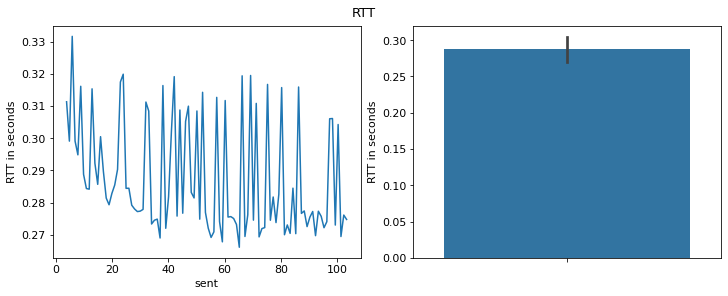

In [7]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 4))

fig.suptitle('RTT')
g = sns.lineplot(x='sent', y='rtt', data=traces,ax=axs[0])
g.set_ylabel('RTT in seconds')

g = sns.barplot(y='rtt',data=traces,ax=axs[1], ci='sd')
g.set_ylabel('RTT in seconds')

# Replica CPU usage analysis

In [8]:
replicas = gw.get_replicas(exp_id)
replicas

,ts,podUid,name,hostIP,podIP,startTime,image,container_id,namespace,nodeName,cpu_request,mem_request,state,zone,cluster,fn,pod_type
0,1.881643,76131a4d-3bc6-4ca5-af9c-a77ae1574ae9,mobilenet-deployment-eb-b-xeongpu-0-0,10.0.2.50,10.42.26.213,2022-07-17T10:20:23Z,edgerun/mobilenet-inference:1.0.0,2a5f73f46064379581047e93dd4c30cf67e0a32f1a5d61...,default,eb-b-xeongpu-0,100,209715200,running,zone-b,Cloudlet,mobilenet,N/A


In [9]:
replica_name_pattern = 'mobilenet'
cpu_containers = gw.get_cpu_containers_by_name(exp_id, replica_name_pattern)
cpu_containers = cpu_containers.drop(labels='ts',axis=1)
cpu_containers.columns

Index(['result', 'table', '_start', '_stop', '_time', 'value', '_field',
       '_measurement', 'exp_id', 'metric', 'node', 'subsystem', 'value_ms',
       'milli_cores', 'percentage', 'percentage_relative', 'zone', 'cluster',
       'name', 'id', 'image', 'cpu_request', 'mem_request_mb'],
      dtype='object')

<AxesSubplot:xlabel='ts', ylabel='percentage_relative'>

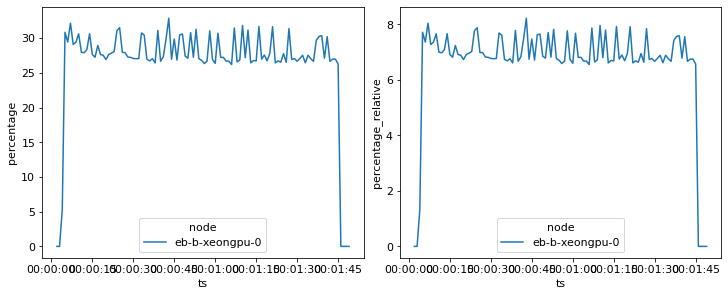

In [10]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 4))

df = cpu_containers.reset_index()
df['ts'] = df['ts'].map(lambda x: x.ceil('s'))

g = sns.lineplot(x='ts', y='percentage', hue='node',markers=True, dashes=False, data=df, ax=axs[0])
sns.lineplot(x='ts', y='percentage_relative', hue='node',markers=True, dashes=False, data=df, ax=axs[1])

In [11]:
df.columns

Index(['ts', 'result', 'table', '_start', '_stop', '_time', 'value', '_field',
       '_measurement', 'exp_id', 'metric', 'node', 'subsystem', 'value_ms',
       'milli_cores', 'percentage', 'percentage_relative', 'zone', 'cluster',
       'name', 'id', 'image', 'cpu_request', 'mem_request_mb'],
      dtype='object')

# Telemetry data

In [12]:
tel = gw.preprocessed_telemetry(exp_id)
tel

,result,table,_start,_stop,_time,value,_field,_measurement,exp_id,metric,node,ts,subsystem
ts,,,,,,,,,,,,,
1970-01-01 00:00:01.466998507,_result,0,1970-01-01 00:00:00+00:00,2022-07-18 12:50:53.115192+00:00,2022-07-17 10:20:32.329000+00:00,9.045226,value,telemetry,202207171020-8bef,cpu,eb-b-xeongpu-0,1.466999,NaN
1970-01-01 00:00:02.469414403,_result,1,1970-01-01 00:00:00+00:00,2022-07-18 12:50:53.115192+00:00,2022-07-17 10:20:33.331000+00:00,2.020202,value,telemetry,202207171020-8bef,cpu,eb-b-xeongpu-0,2.469414,NaN
1970-01-01 00:00:03.467515876,_result,2,1970-01-01 00:00:00+00:00,2022-07-18 12:50:53.115192+00:00,2022-07-17 10:20:34.329000+00:00,2.512563,value,telemetry,202207171020-8bef,cpu,eb-b-xeongpu-0,3.467516,NaN
1970-01-01 00:00:04.467795779,_result,3,1970-01-01 00:00:00+00:00,2022-07-18 12:50:53.115192+00:00,2022-07-17 10:20:35.330000+00:00,13.432836,value,telemetry,202207171020-8bef,cpu,eb-b-xeongpu-0,4.467796,NaN
1970-01-01 00:00:05.466962268,_result,4,1970-01-01 00:00:00+00:00,2022-07-18 12:50:53.115192+00:00,2022-07-17 10:20:36.329000+00:00,13.000000,value,telemetry,202207171020-8bef,cpu,eb-b-xeongpu-0,5.466962,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:01:45.979295422,_result,8715,1970-01-01 00:00:00+00:00,2022-07-18 12:50:53.115192+00:00,2022-07-17 10:22:16.841000+00:00,0.000000,value,telemetry,202207171020-8bef,wr,eb-b-xeongpu-0,105.979295,sdb
1970-01-01 00:01:46.974001576,_result,8716,1970-01-01 00:00:00+00:00,2022-07-18 12:50:53.115192+00:00,2022-07-17 10:22:17.836000+00:00,0.000000,value,telemetry,202207171020-8bef,wr,eb-b-xeongpu-0,106.974002,sdb
1970-01-01 00:01:47.970068623,_result,8717,1970-01-01 00:00:00+00:00,2022-07-18 12:50:53.115192+00:00,2022-07-17 10:22:18.832000+00:00,0.000000,value,telemetry,202207171020-8bef,wr,eb-b-xeongpu-0,107.970069,sdb


In [13]:
tel['metric'].unique()

array(['cpu', 'freq', 'kubernetes_cgrp_blkio', 'kubernetes_cgrp_cpu',
       'kubernetes_cgrp_memory', 'kubernetes_cgrp_net', 'load1', 'load5',
       'procs', 'psi_cpu', 'psi_io', 'psi_memory', 'ram', 'rd', 'rx',
       'tx', 'wr'], dtype=object)

In [14]:
tel['node'].unique()

array(['eb-b-xeongpu-0'], dtype=object)

In [15]:
container_id = replicas.iloc[0]['container_id']

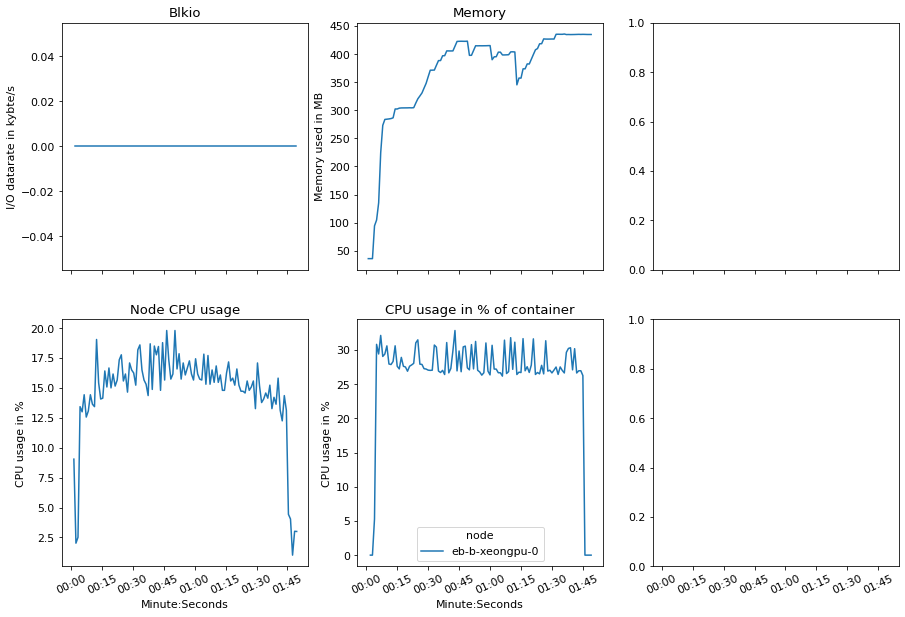

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True)

try:
    blkio = gw.get_blkio_rate_container(exp_id, container_id)
except Error:
    blkio = None

memory = tel[tel['metric'] == 'kubernetes_cgrp_memory']
memory = memory[memory['subsystem'] == container_id]

# Show minutes and seconds
time_format = "%M:%S"
time_form = DateFormatter(time_format)

net = gw.get_network_rate_container(exp_id, container_id)

if blkio is not None:
    # Blkio Rate per container
    g = sns.lineplot(x=blkio.index,y='blkio_rate',data=blkio,ax=axs[0, 0])
    g.set_title('Blkio')
    g.set_ylabel('I/O datarate in kybte/s')


# Memory usage per container
g = sns.lineplot(x=memory.index,y='value',data=memory,ax=axs[0, 1])
g.set_title('Memory')
g.set_ylabel('Memory used in MB')

# Network I/O rate per container
if net is not None:
    g = sns.lineplot(x=net.index,y='net_rate',data=net,ax=axs[0, 2])
    g.set_title('Net')
    g.set_ylabel('Read/Write Network kbyte/s')


# Node CPU Usage
tel_cpu = tel[tel['metric'] == 'cpu']
tel_cpu = tel_cpu[tel_cpu['node'] == node]
g = sns.lineplot(x=tel_cpu.index ,y='value', data=tel_cpu, ax=axs[1, 0])
g.set_title('Node CPU usage')
g.set_ylabel('CPU usage in %')
g.set_xlabel('Minute:Seconds')

axs[1,0].xaxis.set_major_formatter(time_form)
axs[1,0].tick_params(axis='x', labelrotation = 25)

# CPU usage per container
df = cpu_containers.reset_index()
df['ts'] = df['ts'].map(lambda x: x.ceil('s'))
g = sns.lineplot(x='ts', y='percentage', hue='node',markers=True, dashes=False, data=df, ax=axs[1, 1])
g.set_title('CPU usage in % of container')
g.set_ylabel('CPU usage in %')
g.set_xlabel('Minute:Seconds')

axs[1,1].xaxis.set_major_formatter(time_form)
axs[1,1].tick_params(axis='x', labelrotation = 25)


# Emtpy

axs[1,2].xaxis.set_major_formatter(time_form)
axs[1,2].tick_params(axis='x', labelrotation = 25)